# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Zolly Citra Prayogi
- **Email:** zollycitra87@gmail.com
- **ID Dicoding:** zolly_cp

## Menentukan Pertanyaan Bisnis

1. Bagaimana distribusi jumlah total rental sepeda (cnt) berdasarkan musim (season)?
2. Apakah terdapat pola kenaikan atau penurunan jumlah rental sepeda (cnt) dari tahun 2011 ke tahun 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_bike_df = pd.read_csv("data/day.csv")
hour_bike_df = pd.read_csv("data/hour.csv")

data = {
    'day': day_bike_df,
    'hour': hour_bike_df
}

In [3]:
data['day'].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data['hour'].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Tabel `day.csv`

In [5]:
data['day'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
data['day'].isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", data['day'].duplicated().sum())

Jumlah duplikasi:  0


In [8]:
data['day'].describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data `hour.csv`

In [9]:
data['hour'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
data['hour'].isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", data['day'].duplicated().sum())

Jumlah duplikasi:  0


In [12]:
data['day'].describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

mereplace value dari field season, di sesuaikan berdasarkan petunjuk pada file README dalam data

In [13]:
data['day']['season'] = data['day']['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

mereplace value dari field year

In [14]:
data['day']['yr'] = data['day']['yr'].replace({0: '2011', 1: '2012'})

In [15]:
data['day']['dteday'] = pd.to_datetime(data['day']['dteday'])

In [16]:
data['day'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore 'day'

In [17]:
data['day'].sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
244,245,2011-09-02,fall,2011,9,0,5,1,2,0.643333,0.604808,0.727083,0.139929,875,3852,4727
136,137,2011-05-17,summer,2011,5,0,2,1,2,0.561667,0.538529,0.837917,0.277354,678,3445,4123
207,208,2011-07-27,fall,2011,7,0,3,1,1,0.775000,0.690667,0.402917,0.183463,755,3901,4656
605,606,2012-08-28,fall,2012,8,0,2,1,1,0.728333,0.666050,0.620000,0.190925,935,6105,7040
53,54,2011-02-23,spring,2011,2,0,3,1,1,0.221739,0.245717,0.423043,0.094113,139,1778,1917


In [18]:
season_count = data['day'].groupby(by="season").agg({
    "instant": "nunique",
    "cnt":  ["sum"]
})

print(season_count)

       instant      cnt
       nunique      sum
season                 
fall       188  1061129
spring     181   471348
summer     184   918589
winter     178   841613


In [19]:
monthly_count = data['day'].groupby(by=["yr", data['day']['dteday'].dt.to_period('M')]).agg({
    "instant": "nunique",
    "cnt":  ["sum"]
})

print(monthly_count)


             instant     cnt
             nunique     sum
yr   dteday                 
2011 2011-01      31   38189
     2011-02      28   48215
     2011-03      31   64045
     2011-04      30   94870
     2011-05      31  135821
     2011-06      30  143512
     2011-07      31  141341
     2011-08      31  136691
     2011-09      30  127418
     2011-10      31  123511
     2011-11      30  102167
     2011-12      31   87323
2012 2012-01      31   96744
     2012-02      29  103137
     2012-03      31  164875
     2012-04      30  174224
     2012-05      31  195865
     2012-06      30  202830
     2012-07      31  203607
     2012-08      31  214503
     2012-09      30  218573
     2012-10      31  198841
     2012-11      30  152664
     2012-12      31  123713


## Visualization & Explanatory Analysis

### Pertanyaan 1:

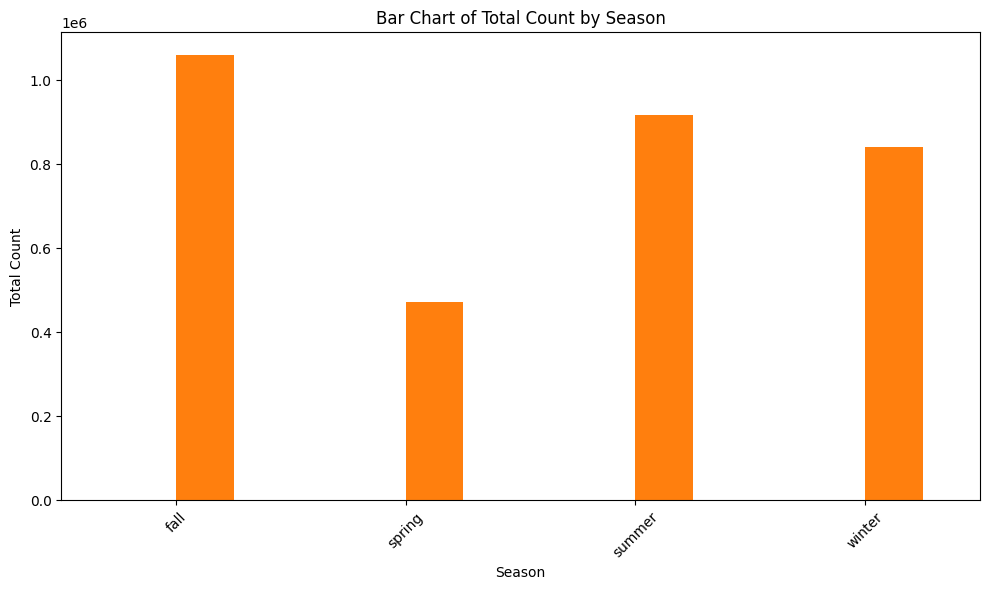

In [20]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
season_count.plot(kind='bar', ax=ax, legend=False)
plt.xlabel('Season')
plt.ylabel('Total Count')
plt.title('Bar Chart of Total Count by Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

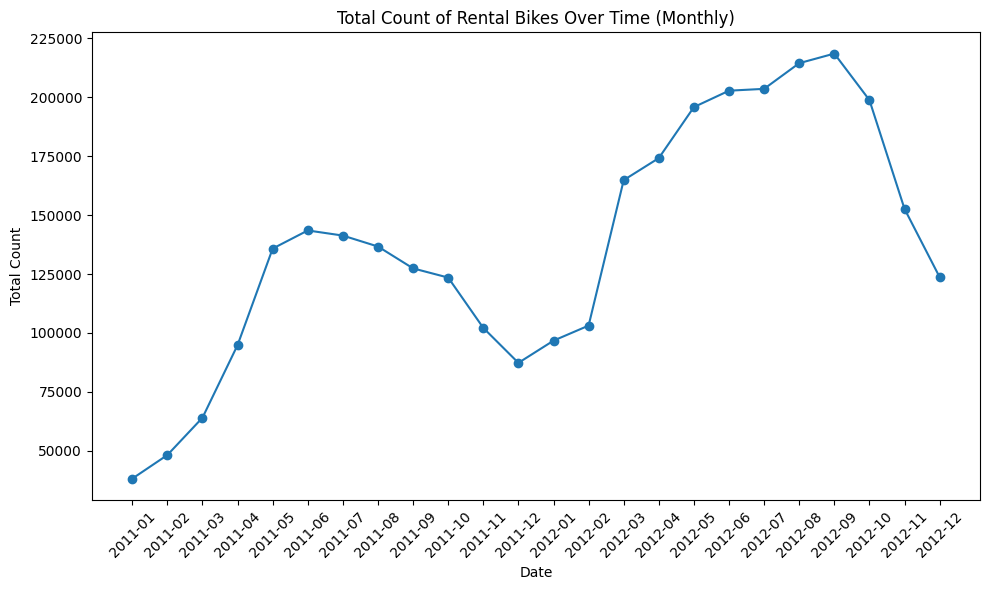

In [21]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_count.index.get_level_values('dteday').strftime('%Y-%m'), monthly_count['cnt'], marker='o', linestyle='-')
plt.title('Total Count of Rental Bikes Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

1. Berdasarkan data, musim panas menunjukkan jumlah total rental sepeda (cnt) tertinggi, diikuti oleh musim gugur, musim dingin, dan musim semi dengan jumlah yang lebih rendah. Oleh karena itu, terdapat variasi dalam distribusi jumlah rental sepeda berdasarkan musim, dengan musim panas menjadi yang paling diminati dan musim semi yang paling kurang diminati.

2. Berdasarkan data yang diberikan, terlihat bahwa jumlah rental sepeda (cnt) cenderung mengalami peningkatan dari tahun 2011 ke tahun 2012. Hal ini terbukti dari observasi bahwa jumlah rental sepeda pada setiap bulan tahun 2012 secara konsisten lebih tinggi dibandingkan dengan tahun sebelumnya. Total jumlah rental sepeda pada tahun 2012 juga secara keseluruhan lebih tinggi daripada tahun 2011, dengan peningkatan yang konsisten dari bulan ke bulan. Dengan demikian, data menunjukkan pola kenaikan jumlah rental sepeda dari tahun 2011 ke tahun 2012.